In [1]:
import tensorflow as tf
import numpy as np

In [3]:
greeting = tf.constant('Hello Google Tensorflow!')

# 见https://github.com/OlafenwaMoses/ImageAI/issues/400
tf.compat.v1.disable_eager_execution() 
#在新的Tensorflow 2.0版本中已经移除了Session这一模块，改换运行代码为tf.compat.v1.Session()
sess = tf.compat.v1.Session()
result = sess.run(greeting)
print(result)
sess.close()

b'Hello Google Tensorflow!'


In [6]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
product = tf.matmul(matrix1, matrix2)
linear = tf.add(product, tf.constant(2.0))

with tf.compat.v1.Session() as sess:
    result = sess.run(linear)
    print(result)

[[14.]]


In [7]:
import pandas as pd

train = pd.read_csv('../datasets/Breast-Cancer/breast-cancer-train.csv')
test = pd.read_csv('../datasets/Breast-Cancer/breast-cancer-test.csv')

X_train = np.float32(train[['Clump Thickness', 'Cell Size']].T)
y_train = np.float32(train['Type'].T)
X_test = np.float32(test[['Clump Thickness', 'Cell Size']].T)
y_test = np.float32(test['Type'].T)

In [17]:
b = tf.Variable(tf.zeros([1]))
#tf2.0改版,tf.random_uniform -------->  tf.random.uniform
W = tf.Variable(tf.random.uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, X_train) + b

# 最小化方差
loss = tf.reduce_mean(tf.square(y - y_train))
#tf2.0改版,tf.compat.v1.train.GradientDescentOptimizer
optimizer =  tf.compat.v1.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# 初始化变量
#tf2.0改版,tf.compat.v1.global_variables_initializer()
init = tf.compat.v1.global_variables_initializer()

# 启动图 (graph)
sess = tf.compat.v1.Session()
sess.run(init)

# 拟合平面
for step in range(0, 1000):
    sess.run(train)
    if step % 200 == 0:
        print(step, sess.run(W), sess.run(b))

0 [[ 0.5419428  -0.53877485]] [0.03529364]
200 [[0.08578986 0.04367978]] [-0.04976499]
400 [[0.05943178 0.07469792]] [-0.07988662]
600 [[0.05796986 0.07711124]] [-0.08566719]
800 [[0.05787044 0.07737945]] [-0.08667766]


In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


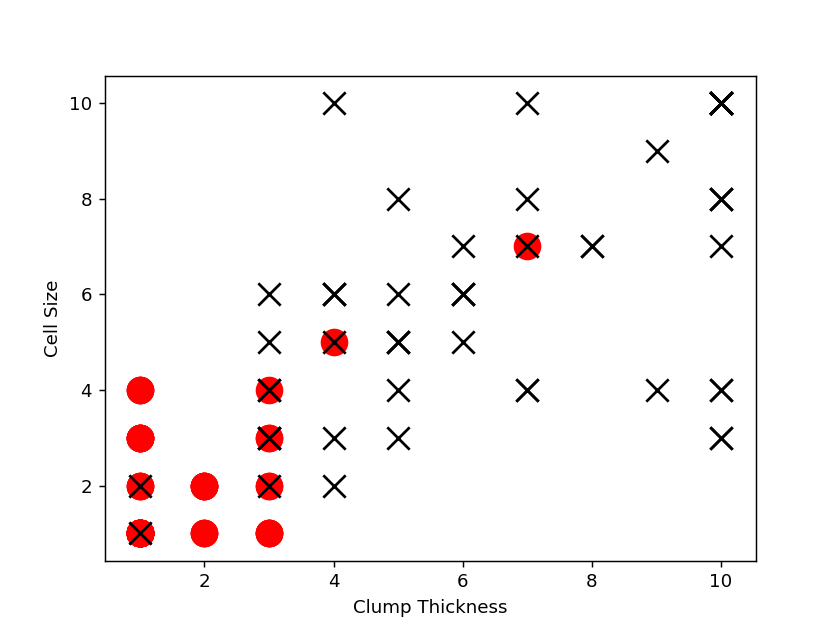

Text(0, 0.5, 'Cell Size')

In [20]:
test_negative = test.loc[test['Type'] == 0][['Clump Thickness', 'Cell Size']]
test_positive = test.loc[test['Type'] == 1][['Clump Thickness', 'Cell Size']]

plt.scatter(test_negative['Clump Thickness'], test_negative['Cell Size'],
            marker='o', s = 200, c = 'red')
plt.scatter(test_positive['Clump Thickness'], test_positive['Cell Size'],
            marker='x', s = 150, c = 'black')

plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

<IPython.core.display.Javascript object>


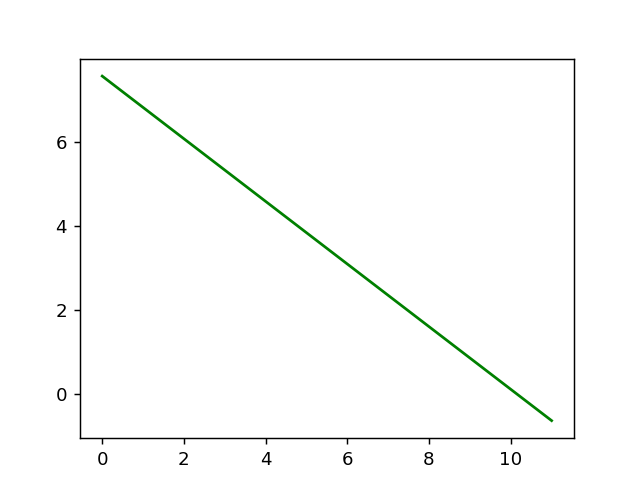

In [23]:
lx = np.arange(0, 12)
ly = (0.5 - sess.run(b) - lx * sess.run(W)[0][0]) / sess.run(W)[0][1]

plt.plot(lx, ly, color ='green')
plt.show()

In [25]:
from sklearn import datasets, metrics, preprocessing, model_selection

# Load dataset
boston = datasets.load_boston()
X, y = boston.data, boston.target

# Split dataset into train / test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                     test_size=0.25, random_state=33)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
import skflow

AttributeError: module 'tensorflow_core._api.v2.train' has no attribute 'GradientDescentOptimizer'

In [ ]:

tf_lr = skflow.TensorFlowLinearRegressor(steps=10000, learning_rate=0.01, batch_size=50)
tf_lr.fit(X_train, y_train)
tf_lr_y_predict = tf_lr.predict(X_test)

print('The mean absoluate error of Tensorflow Linear Regressor on boston dataset is',
      metrics.mean_absolute_error(tf_lr_y_predict, y_test)
     )
print('The mean squared error of Tensorflow Linear Regressor on boston dataset is',
      metrics.mean_squared_error(tf_lr_y_predict, y_test)
     )
print('The R-squared value of Tensorflow Linear Regressor on boston dataset is',
      metrics.r2_score(tf_lr_y_predict, y_test)
     )